# quick look at aviso data

In [15]:
import numpy as np
import xarray as xr
from glob import glob

from matplotlib import pyplot as plt
%matplotlib inline

#aviso_dir = '/work/ALT/odatis/AVISO/2019/'
aviso_dir = '/work/ALT/odatis/AVISO/'

In [2]:
from dask_jobqueue import PBSCluster
#cluster = PBSCluster(cores=6, walltime='12:00:00', memory='20GB')
cluster = PBSCluster()
w = cluster.scale(1*12)
#w = cluster.scale(10) # postprocessing

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)
#client = Client()

In [4]:
#client
cluster

/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/distributed/scheduler.py:313: UserWarning: WorkerState.ncores has moved to WorkerState.nthreads
  warnings.warn("WorkerState.ncores has moved to WorkerState.nthreads")


In [19]:
client

Client Scheduler: tcp://10.135.39.59:35401 Dashboard: http://10.135.39.59:8787/status,Cluster Workers: 12 Cores: 24 Memory: 99.96 GB


---

## load raw data as xarray dataset and then a dataframe

In [22]:
av = xr.open_mfdataset(glob(aviso_dir+'*/*.nc'), concat_dim='time', parallel=True, combine='nested')
av

KeyboardInterrupt: 

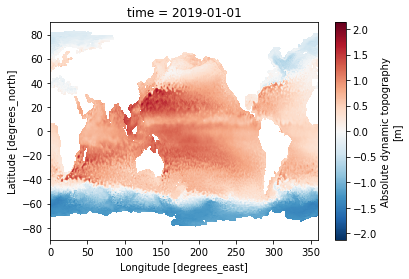

/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/distributed/scheduler.py:313: UserWarning: WorkerState.ncores has moved to WorkerState.nthreads
  warnings.warn("WorkerState.ncores has moved to WorkerState.nthreads")


In [11]:
av.adt.sel(time='2019-01-01').plot()

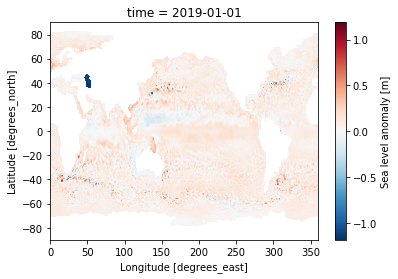

/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/distributed/scheduler.py:313: UserWarning: WorkerState.ncores has moved to WorkerState.nthreads
  warnings.warn("WorkerState.ncores has moved to WorkerState.nthreads")


In [12]:
av.sla.sel(time='2019-01-01').plot()

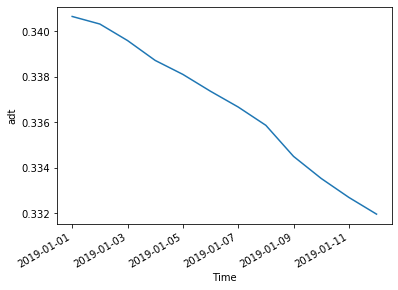

/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/distributed/scheduler.py:313: UserWarning: WorkerState.ncores has moved to WorkerState.nthreads
  warnings.warn("WorkerState.ncores has moved to WorkerState.nthreads")


In [13]:
av.adt.mean(dim=['longitude','latitude']).plot()

---

In [23]:
cluster.close()

Future exception was never retrieved
future: <Future finished exception=OSError("Timed out trying to connect to 'tcp://10.135.36.196:41887' after 10 s: in <distributed.comm.tcp.TCPConnector object at 0x2adca93d3710>: ConnectionRefusedError: [Errno 111] Connection refused")>
Traceback (most recent call last):
  File "/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/distributed/comm/core.py", line 218, in connect
    quiet_exceptions=EnvironmentError,
  File "/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/tornado/gen.py", line 735, in run
    value = future.result()
tornado.util.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.throw(*exc_info)  # type: ignore
  File "/home/mp/pontea/.conda/envs/equinox/lib/python3.7/site-packages/distributed/utils.py", 